In [29]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> h

Commands:
  d) Download a package or collection     u) Update out of date packages
  l) List packages & collections          h) Help
  c) View & Modify Configuration          q) Quit

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



In [21]:
imdb_data=pd.read_csv('/content/Test.csv.zip')
print(imdb_data.shape)
imdb_data.head(10)

(5000, 2)


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
5,"I saw this film on September 1st, 2005 in Indi...",1
6,I saw a screening of this movie last night. I ...,0
7,William Hurt may not be an American matinee id...,1
8,IT IS A PIECE OF CRAP! not funny at all. durin...,0
9,I'M BOUT IT(1997)<br /><br />Developed & publi...,0


In [22]:
imdb_data['label'].value_counts()


label
1    2505
0    2495
Name: count, dtype: int64

Splitting the dataset into a training set and a valuation set

In [26]:
#split the dataset
#train dataset
train_text=imdb_data.text[:4000]
train_label=imdb_data.label[:4000]
#test dataset
test_text=imdb_data.text[4000:]
test_label=imdb_data.label[4000:]
print(train_text.shape,train_label.shape)
print(test_text.shape,test_label.shape)

(4000,) (4000,)
(1000,) (1000,)


tokenization of text to split the words

In [30]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [31]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['text']=imdb_data['text'].apply(denoise_text)

<ipython-input-31-a06e5ff22d76>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [33]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['text']=imdb_data['text'].apply(remove_special_characters)

In [34]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['text']=imdb_data['text'].apply(simple_stemmer)

In [36]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
imdb_data['text']=imdb_data['text'].apply(remove_stopwords)

{'who', 'then', 'just', 'where', 'am', 'what', 'of', 'after', 'any', 'herself', 'shouldn', 'off', 'for', "wouldn't", 'weren', 'there', "hasn't", 'he', 'itself', 'a', "she's", 'they', 'them', 'more', 'by', 'before', 'will', 'll', 'the', 'be', 'theirs', 'these', 'very', 'again', 'most', 'being', 'until', 'were', 'an', "that'll", "you've", 'that', 'at', 'why', "didn't", 'hasn', 'are', "isn't", 'and', "you'd", 's', 'but', 'themselves', 'all', 'this', 'as', 're', 've', 'isn', 'out', "shouldn't", 'you', 'with', 'few', 'my', 'haven', "hadn't", 'over', 'mightn', 'had', 'our', 'into', 'between', 'on', 'hadn', 'or', "don't", "you're", 'nor', 'up', 'only', "wasn't", 'don', 'i', 'wouldn', 'o', 'now', 'won', 'needn', 'below', "should've", 'd', 'further', 'those', 'myself', "aren't", 'so', 'its', 'which', 'both', 'whom', 'their', 'has', 'been', "it's", 'does', 'ours', 'didn', "mightn't", 'because', 'in', 'during', 'own', 'should', "needn't", 'through', 'about', 'mustn', 'while', 'ain', 'when', 'hers

In [43]:
#normalized train reviews
norm_train_text=imdb_data.text[:40000]
norm_train_text[0]
#convert dataframe to string
#norm_train_string=norm_train_text.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'alway wrote thi seri complet stinkfest becaus jim belushi wa involv heavili one day tragic happenst occur white sox game end realiz remot wa way side room somehow could gotten walk across room get remot even tv turn channel whi get walk across countri watch tv anoth state nut said decid hang tight couch take whatev fate store fate store wa episod thi show episod rememb veri littl except onc made veri broad gener sweep blanket judgment base zero object experienti evid noth whatsoev back opinion onc wa complet right thi show total crudpi belushi ha comed deliveri hairi lighthous foghorn women physic attract stepfordi elicit ani real feel viewer absolut reason stop run local tv station gasolin flamethrow send everi copi thi mutt howl back hell except except wonder comic sti ling larri joe campbel america greatest comic charact actor thi guy play belushi brotherinlaw andi gold good realli well asid funni hi job make belushi look good like tri make butt wart look good campbel pull style so

In [54]:
#Normalized test reviews
norm_test_text=imdb_data.text[4000:]
norm_test_text[4000]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words


'bedroom hallway wa one funniest film 1999 melbourn film festiv uk young crowd flatmat variou relationship dilemma much humour centr around newagey men selfhelp group pass around variou implement like rock truth also go hunter gather weekend hilari result trust youll laugh teeth'

In [79]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_text=cv.fit_transform(norm_train_text)
#transformed test reviews
cv_test_text=cv.transform(norm_test_text)

print('BOW_cv_train:',cv_train_text.shape)
print('BOW_cv_test:',cv_test_text.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (5000, 981174)
BOW_cv_test: (1000, 981174)


In [80]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_text=tv.fit_transform(norm_train_text)
#transformed test reviews
tv_test_text=tv.transform(norm_test_text)
print('Tfidf_train:',tv_train_text.shape)
print('Tfidf_test:',tv_test_text.shape)

Tfidf_train: (5000, 981174)
Tfidf_test: (1000, 981174)


In [81]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
label_data=lb.fit_transform(imdb_data['label'])
print(label_data.shape)

(5000, 1)


In [82]:
#Spliting the sentiment data
train_label=label_data[:5000]
test_label=label_data[5000:]
print(train_label)
print(test_label)


[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[]


In [83]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_text,train_label)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_text,train_label)
print(lr_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [84]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_text)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_text)
print(lr_tfidf_predict)

[1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0
 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 1 1 

In [86]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       478
    Negative       1.00      1.00      1.00       522

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       478
    Negative       1.00      1.00      1.00       522

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



<function matplotlib.pyplot.show(close=None, block=None)>

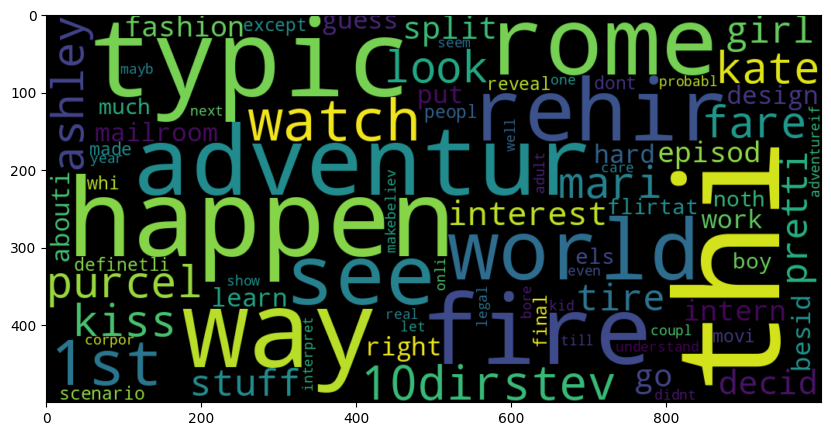

In [89]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_text[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

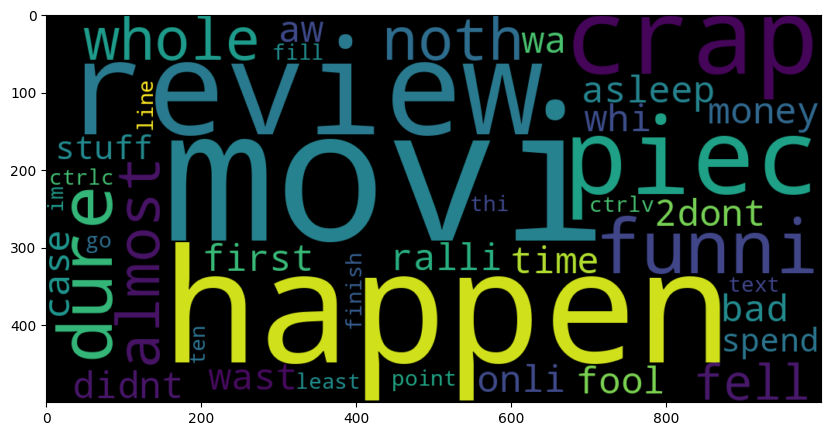

In [91]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_text[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show